In [ ]:
TRAIN_CSV_PATH='../../dataset/train_feat.csv'
TEST_CSV_PATH='../../dataset/test_feat.csv'



In [1]:
import numpy as np
def featurizer(train_df,test_df):
    train_df["W/L"]=train_df["Width (mm)"]/train_df["Length (mm)"]
    train_df["L/T"]=train_df["Length (mm)"]/train_df["Thickness (mm)"]
    train_df["W/T"]=train_df["Thickness (mm)"]/train_df["Width (mm)"]
    train_df["Total_Alloy_wt"] = train_df[[
        "C, wt.%", "Si, wt.%", "Mn, wt.%", "P, wt.%", "S, wt.%",
        "Ni, wt.%", "Cr, wt.%", "Mo, wt.%", "Al, wt.%", "N, wt.%",
        "Ti, wt.%", "Nb, wt.%", "B, wt.%", "Cu, wt.%", "V, wt.%",
        "Zr, wt.%", "W, wt.%", "Sn, wt.%", "Co, wt.%", "O, wt,%",
        "Ta, wt.%", "As, wt%", "Sb, wt.%"
    ]].sum(axis=1)

    train_df["Embrittling_Elements"] = (
        train_df["P, wt.%"] +
        train_df["S, wt.%"] +
        train_df["Cu, wt.%"] +
        train_df["As, wt%"] +
        train_df["Sb, wt.%"] +
        train_df["B, wt.%"]
    )

    train_df["Toughness_Enhancers"] = (
        train_df["Ni, wt.%"] +
        train_df["Mn, wt.%"] +
        train_df["Mo, wt.%"] +
        train_df["V, wt.%"] +
        train_df["Ti, wt.%"] +
        train_df["Nb, wt.%"]
    )

    train_df["Hardener_Elements"] = (
        train_df["C, wt.%"] +
        train_df["Cr, wt.%"] +
        train_df["Mo, wt.%"] +
        train_df["V, wt.%"] +
        train_df["W, wt.%"]
    )

    train_df["Aging_Sensitive"] = (
        train_df["Cu, wt.%"] +
        train_df["Ni, wt.%"] +
        train_df["P, wt.%"]
    )

    train_df["Carbon_Equivalent"] = (
        train_df["C, wt.%"] +
        (train_df["Mn, wt.%"] + train_df["Si, wt.%"]) / 6 +
        (train_df["Cr, wt.%"] + train_df["Mo, wt.%"] + train_df["V, wt.%"]) / 5 +
        (train_df["Ni, wt.%"] + train_df["Cu, wt.%"]) / 15
    )

    train_df["Fe_Deficit"] = 100 - train_df["Fe, wt.%"]

    # Compute derived features for alloy analysis
    test_df["W/L"]=test_df["Width (mm)"]/test_df["Length (mm)"]
    test_df["L/T"]=test_df["Length (mm)"]/test_df["Thickness (mm)"]
    test_df["W/T"]=test_df["Thickness (mm)"]/test_df["Width (mm)"]
    test_df["Total_Alloy_wt"] = test_df[[
        "C, wt.%", "Si, wt.%", "Mn, wt.%", "P, wt.%", "S, wt.%",
        "Ni, wt.%", "Cr, wt.%", "Mo, wt.%", "Al, wt.%", "N, wt.%",
        "Ti, wt.%", "Nb, wt.%", "B, wt.%", "Cu, wt.%", "V, wt.%",
        "Zr, wt.%", "W, wt.%", "Sn, wt.%", "Co, wt.%", "O, wt,%",
        "Ta, wt.%", "As, wt%", "Sb, wt.%"
    ]].sum(axis=1)
    test_df["Embrittling_Elements"] = (
        test_df["P, wt.%"] +
        test_df["S, wt.%"] +
        test_df["Cu, wt.%"] +
        test_df["As, wt%"] +
        test_df["Sb, wt.%"] +
        test_df["B, wt.%"]
    )

    test_df["Toughness_Enhancers"] = (
        test_df["Ni, wt.%"] +
        test_df["Mn, wt.%"] +
        test_df["Mo, wt.%"] +
        test_df["V, wt.%"] +
        test_df["Ti, wt.%"] +
        test_df["Nb, wt.%"]
    )

    test_df["Hardener_Elements"] = (
        test_df["C, wt.%"] +
        test_df["Cr, wt.%"] +
        test_df["Mo, wt.%"] +
        test_df["V, wt.%"] +
        test_df["W, wt.%"]
    )

    test_df["Aging_Sensitive"] = (
        test_df["Cu, wt.%"] +
        test_df["Ni, wt.%"] +
        test_df["P, wt.%"]
    )

    test_df["Carbon_Equivalent"] = (
        test_df["C, wt.%"] +
        (test_df["Mn, wt.%"] + test_df["Si, wt.%"]) / 6 +
        (test_df["Cr, wt.%"] + test_df["Mo, wt.%"] + test_df["V, wt.%"]) / 5 +
        (test_df["Ni, wt.%"] + test_df["Cu, wt.%"]) / 15
    )

    test_df["Fe_Deficit"] = 100 - test_df["Fe, wt.%"]

    eps = 1e-6  # small value to avoid divide-by-zero


    # 1. Composition Ratios
    train_df['C_Mn'] = train_df['C, wt.%'] / (train_df['Mn, wt.%'] + eps)
    train_df['Cr_Mo_V_Ni'] = train_df[['Cr, wt.%', 'Mo, wt.%', 'V, wt.%', 'Ni, wt.%']].sum(axis=1)
    train_df['NiMn_to_CrMoV'] = (train_df['Ni, wt.%'] + train_df['Mn, wt.%']) / (train_df['Cr, wt.%'] + train_df['Mo, wt.%'] + train_df['V, wt.%'] + eps)
    train_df['Ni_to_Fe'] = train_df['Ni, wt.%'] / (train_df['Fe, wt.%'] + eps)
    train_df['Cr_to_Fe'] = train_df['Cr, wt.%'] / (train_df['Fe, wt.%'] + eps)
    train_df['Mo_to_Fe'] = train_df['Mo, wt.%'] / (train_df['Fe, wt.%'] + eps)

    # 2. Geometry & Stress Features
    train_df['Volume'] = train_df['Length (mm)'] * train_df['Width (mm)'] * train_df['Thickness (mm)']
    train_df['Surface_Area'] = 2 * (
        train_df['Length (mm)'] * train_df['Width (mm)'] +
        train_df['Length (mm)'] * train_df['Thickness (mm)'] +
        train_df['Width (mm)'] * train_df['Thickness (mm)']
    )
    train_df['Compactness'] = train_df['Volume'] / (train_df['Surface_Area'] + eps)

    # Compute missing 'Area' as cross-sectional area
    train_df['Area'] = train_df['Width (mm)'] * train_df['Thickness (mm)']
    train_df['Impact_energy_per_Area'] = train_df['Impact energy (J)'] / (train_df['Area'] + eps)
    train_df['Impact_energy_per_Volume'] = train_df['Impact energy (J)'] / (train_df['Volume'] + eps)

    # 3. Elemental diversity
    element_cols = [col for col in train_df.columns if ', wt.%' in col]
    norm_composition = train_df[element_cols].div(train_df[element_cols].sum(axis=1) + eps, axis=0)
    train_df['Elemental_count'] = (train_df[element_cols] > 0).sum(axis=1)
    train_df['Std_dev_wt'] = train_df[element_cols].std(axis=1)
    train_df['Shannon_entropy_composition'] = -(norm_composition * np.log(norm_composition + eps)).sum(axis=1)

    # 4. Interaction terms
    train_df['C_times_Mn'] = train_df['C, wt.%'] * train_df['Mn, wt.%']
    train_df['Mn_times_Cr'] = train_df['Mn, wt.%'] * train_df['Cr, wt.%']
    train_df['Ni_times_Mo'] = train_df['Ni, wt.%'] * train_df['Mo, wt.%']

    # 5. Physics-inspired placeholders
    magpie_cols = train_df.columns[train_df.columns.str.contains('CovalentRadius') & train_df.columns.str.contains('range')]
    if len(magpie_cols):
        train_df['Solid_solution_strengthening'] = train_df[magpie_cols[0]] * train_df[element_cols].std(axis=1)
    else:
        train_df['Solid_solution_strengthening'] = np.nan

    train_df['Hardness_index'] = (
        0.5 * train_df['C, wt.%'] +
        0.3 * train_df['Mn, wt.%'] +
        0.2 * train_df['Mo, wt.%'] +
        0.1 * train_df['Ni, wt.%']
    )



    # 1. Composition Ratios
    test_df['C_Mn'] = test_df['C, wt.%'] / (test_df['Mn, wt.%'] + eps)
    test_df['Cr_Mo_V_Ni'] = test_df[['Cr, wt.%', 'Mo, wt.%', 'V, wt.%', 'Ni, wt.%']].sum(axis=1)
    test_df['NiMn_to_CrMoV'] = (test_df['Ni, wt.%'] + test_df['Mn, wt.%']) / (test_df['Cr, wt.%'] + test_df['Mo, wt.%'] + test_df['V, wt.%'] + eps)
    test_df['Ni_to_Fe'] = test_df['Ni, wt.%'] / (test_df['Fe, wt.%'] + eps)
    test_df['Cr_to_Fe'] = test_df['Cr, wt.%'] / (test_df['Fe, wt.%'] + eps)
    test_df['Mo_to_Fe'] = test_df['Mo, wt.%'] / (test_df['Fe, wt.%'] + eps)

    # 2. Geometry & Stress Features
    test_df['Volume'] = test_df['Length (mm)'] * test_df['Width (mm)'] * test_df['Thickness (mm)']
    test_df['Surface_Area'] = 2 * (
        test_df['Length (mm)'] * test_df['Width (mm)'] +
        test_df['Length (mm)'] * test_df['Thickness (mm)'] +
        test_df['Width (mm)'] * test_df['Thickness (mm)']
    )
    test_df['Compactness'] = test_df['Volume'] / (test_df['Surface_Area'] + eps)

    # Compute missing 'Area' as cross-sectional area
    test_df['Area'] = test_df['Width (mm)'] * test_df['Thickness (mm)']
    test_df['Impact_energy_per_Area'] = test_df['Impact energy (J)'] / (test_df['Area'] + eps)
    test_df['Impact_energy_per_Volume'] = test_df['Impact energy (J)'] / (test_df['Volume'] + eps)

    # 3. Elemental diversity
    element_cols = [col for col in test_df.columns if ', wt.%' in col]
    norm_composition = test_df[element_cols].div(test_df[element_cols].sum(axis=1) + eps, axis=0)
    test_df['Elemental_count'] = (test_df[element_cols] > 0).sum(axis=1)
    test_df['Std_dev_wt'] = test_df[element_cols].std(axis=1)
    test_df['Shannon_entropy_composition'] = -(norm_composition * np.log(norm_composition + eps)).sum(axis=1)

    # 4. Interaction terms
    test_df['C_times_Mn'] = test_df['C, wt.%'] * test_df['Mn, wt.%']
    test_df['Mn_times_Cr'] = test_df['Mn, wt.%'] * test_df['Cr, wt.%']
    test_df['Ni_times_Mo'] = test_df['Ni, wt.%'] * test_df['Mo, wt.%']

    # 5. Physics-inspired placeholders
    magpie_cols = test_df.columns[test_df.columns.str.contains('CovalentRadius') & test_df.columns.str.contains('range')]
    if len(magpie_cols):
        test_df['Solid_solution_strengthening'] = test_df[magpie_cols[0]] * test_df[element_cols].std(axis=1)
    else:
        test_df['Solid_solution_strengthening'] = np.nan

    test_df['Hardness_index'] = (
        0.5 * test_df['C, wt.%'] +
        0.3 * test_df['Mn, wt.%'] +
        0.2 * test_df['Mo, wt.%'] +
        0.1 * test_df['Ni, wt.%']
    )

    return train_df, test_df

In [2]:
import numpy as np

def median_absolute_percentage_error(y_true, y_pred, *, sample_weight=None, multioutput="uniform_average"):
    """
    Median absolute percentage error regression loss.
    Compatible with sklearn-style usage.
    """
    y_true = np.array(y_true, dtype=np.float64).ravel()
    y_pred = np.array(y_pred, dtype=np.float64).ravel()

    # avoid division by zero
    nonzero_mask = y_true != 0
    if not np.any(nonzero_mask):
        raise ValueError("All y_true values are zero; MAPE cannot be calculated.")

    errors = np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])

    return np.median(errors)


In [3]:
feature_to_remove = []
feature_to_include = []
# DBTT
# feature_to_include = ["C, wt.%",	"Si, wt.%",	"Mn, wt.%",	"P, wt.%",	"S, wt.%",	"Ni, wt.%",	"Cr, wt.%",	"Mo, wt.%",	"Al, wt.%",	"N, wt.%",	"Ti, wt.%",	"Fe, wt.%",	"Nb, wt.%",	"B, wt.%",	"Cu, wt.%",	"V, wt.%",	"Zr, wt.%",	"W, wt.%",	"Sn, wt.%",	"Co, wt.%",	"O, wt,%", "Ta, wt.%",	"As, wt%","Sb, wt.%",'MagpieData mean GSbandgap', 'MagpieData avg_dev GSbandgap', 'Test Temperature (C) ', 'MagpieData mean MeltingT', 'Solid_solution_strengthening', 'C_Mn', 'Embrittling_Elements', 'Impact_energy_per_Volume', 'MagpieData mean NdValence', 'Impact energy (J)', 'Impact_energy_per_Area', 'Compactness', 'MagpieData mean SpaceGroupNumber', 'Cr_to_Fe', 'MagpieData avg_dev NUnfilled', 'Area',  'MagpieData mean NValence', 'Surface_Area', 'Volume', 'MagpieData mean NUnfilled', 'MagpieData avg_dev NpUnfilled', 'MagpieData avg_dev NpValence', 'Aging_Sensitive', 'MagpieData avg_dev NsValence', 'MagpieData mean NpUnfilled', 'MagpieData avg_dev SpaceGroupNumber', 'MagpieData mean NsUnfilled', 'MagpieData mean NsValence', 'MagpieData avg_dev MeltingT', 'Ni_to_Fe', 'MagpieData mean NpValence', 'C_times_Mn', 'Elemental_count', 'NiMn_to_CrMoV', 'MagpieData avg_dev Column', 'MagpieData avg_dev NsUnfilled', 'MagpieData avg_dev NdUnfilled', 'MagpieData mean GSvolume_pa',  'MagpieData avg_dev MendeleevNumber', 'Cr_Mo_V_Ni', 'MagpieData mean Electronegativity', 'Mn_times_Cr', 'W/L', 'MagpieData mean CovalentRadius',  'L/T', 'Carbon_Equivalent', 'MagpieData avg_dev CovalentRadius']

# USE
feature_to_include = ["C, wt.%",	"Si, wt.%",	"Mn, wt.%",	"P, wt.%",	"S, wt.%",	"Ni, wt.%",	"Cr, wt.%",	"Mo, wt.%",	"Al, wt.%",	"N, wt.%",	"Ti, wt.%",	"Fe, wt.%",	"Nb, wt.%",	"B, wt.%",	"Cu, wt.%",	"V, wt.%",	"Zr, wt.%",	"W, wt.%",	"Sn, wt.%",	"Co, wt.%",	"O, wt,%",	"Ta, wt.%",	"As, wt%",	"Sb, wt.%",'Test Temperature (C) ', 'Impact energy (J)', 'Surface_Area', 'Area', 'Impact_energy_per_Area', 'Compactness', 'Volume', 'S, wt.%', 'W/L', 'Impact_energy_per_Volume', 'MagpieData minimum NUnfilled', 'MagpieData maximum NpUnfilled', 'Mn_times_Cr', 'Cr, wt.%', 'MagpieData avg_dev NUnfilled', 'MagpieData avg_dev NsUnfilled', 'Hardness_index', 'MagpieData avg_dev NdValence', 'Elemental_count', 'MagpieData mean NsUnfilled', 'MagpieData maximum NdValence', 'MagpieData avg_dev NValence', 'Embrittling_Elements', 'MagpieData avg_dev GSvolume_pa', 'Sn, wt.%', 'MagpieData minimum NValence', 'Toughness_Enhancers', 'V, wt.%', 'Mo_to_Fe', 'MagpieData avg_dev SpaceGroupNumber', 'MagpieData range MeltingT', 'Co, wt.%', 'Ni_times_Mo', 'MagpieData avg_dev NdUnfilled', 'C_times_Mn', 'Mn, wt.%', 'Hardener_Elements', 'N, wt.%', 'MagpieData minimum SpaceGroupNumber', 'Cu, wt.%', 'MagpieData maximum NpValence', 'Cr_to_Fe', 'B, wt.%', 'C, wt.%', 'MagpieData range NdValence', 'MagpieData range GSvolume_pa', 'C_Mn', 'MagpieData mean GSbandgap', 'MagpieData avg_dev NpUnfilled', 'Ni_to_Fe']

(3694, 75)
(3466, 75)
Epoch 100/5000, Train MAE: 5.9267, Val MAE: 6.9398, Test MAE: 7.1343
Epoch 200/5000, Train MAE: 4.9578, Val MAE: 6.3701, Test MAE: 6.3622
Epoch 300/5000, Train MAE: 4.4268, Val MAE: 5.9899, Test MAE: 6.3622
Epoch 400/5000, Train MAE: 3.9887, Val MAE: 5.2904, Test MAE: 6.2215
Epoch 500/5000, Train MAE: 3.7497, Val MAE: 5.2904, Test MAE: 6.0403
Epoch 600/5000, Train MAE: 3.5484, Val MAE: 5.1475, Test MAE: 5.9728
Epoch 700/5000, Train MAE: 3.4303, Val MAE: 5.1475, Test MAE: 5.8399
Epoch 800/5000, Train MAE: 3.1000, Val MAE: 5.1475, Test MAE: 5.8399
Epoch 900/5000, Train MAE: 3.1000, Val MAE: 5.0787, Test MAE: 5.8399
Epoch 1000/5000, Train MAE: 2.8430, Val MAE: 5.0787, Test MAE: 5.8399
Epoch 1100/5000, Train MAE: 2.8430, Val MAE: 5.0787, Test MAE: 5.8399
Epoch 1200/5000, Train MAE: 2.7642, Val MAE: 5.0787, Test MAE: 5.8399
Epoch 1300/5000, Train MAE: 2.6614, Val MAE: 5.0787, Test MAE: 5.8399
Epoch 1400/5000, Train MAE: 2.4266, Val MAE: 5.0787, Test MAE: 5.8399
Epoch 1

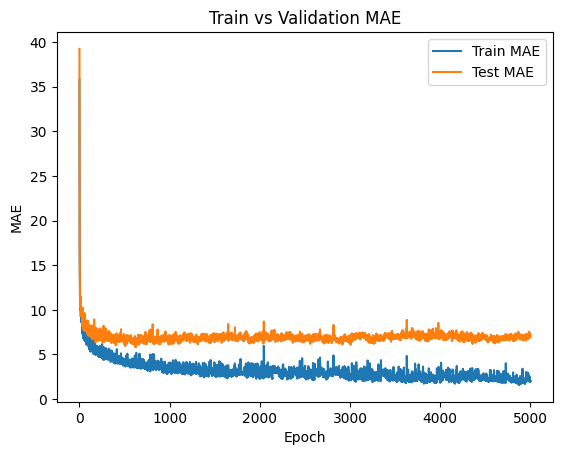

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_absolute_error
import random



seed=911
random.seed(seed)                         # Python RNG
np.random.seed(seed)                      # NumPy RNG
torch.manual_seed(seed)                   # PyTorch CPU RNG
torch.cuda.manual_seed(seed)               # Current GPU RNG
torch.cuda.manual_seed_all(seed)           # All GPU devices RNG

# Make operations deterministic (slightly slower)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# -------------------------
# Define Model
# -------------------------
class MLPWithAttention(nn.Module):
    def __init__(self, input_dim, hidden_dims=[512]*8, embed_dim=256, num_heads=128, dropout=0):
        super().__init__()
        layers = []
        prev_dim = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(prev_dim, h))
            layers.append(nn.ReLU(0.1))
            layers.append(nn.Dropout(dropout))
            prev_dim = h
        self.mlp = nn.Sequential(*layers)
        self.proj = nn.Linear(prev_dim, embed_dim)
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.regressor = nn.Linear(embed_dim, 1)

    def forward(self, x):
        out = self.mlp(x)
        out = self.proj(out).unsqueeze(1)
        attn_out, _ = self.attn(out, out, out)
        out = attn_out.mean(dim=1)
        return self.regressor(out).squeeze(-1)

# -------------------------
# Load Data
# -------------------------
train_df = pd.read_csv(TRAIN_CSV_PATH).select_dtypes(include="number")
test_df = pd.read_csv(TEST_CSV_PATH).select_dtypes(include="number")

# -------------------------
# Feature engineering placeholders
train_df,test_df=featurizer(train_df,test_df)
# features=list( train_df.columns)

# fea_wo_magpie=[fea for fea in features if "Magpie" not in fea]
# train_df,test_df=(train_df[fea_wo_magpie],test_df[fea_wo_magpie])

# -------------------------
train_df, test_df = featurizer(train_df, test_df)  # define this if needed
cols_to_drop = ['DBTT', 'USE', "Width (mm)", "Length (mm)", "Thickness (mm)"]

target = "USE"
# -------------------------
# Filter outliers in target
# -------------------------
mean_val = train_df[target].mean()
std_val = train_df[target].std()
# lower_bound = mean_val - 2.25 * std_val
upper_bound = mean_val + 1.75 * std_val

train_df = train_df.dropna(subset=[target])
if feature_to_include:
    existing_features = [f for f in feature_to_include if f in train_df.columns]
    train_df = train_df[existing_features + [target]]
print(train_df.shape)
# train_df = train_df[(train_df[target] >= lower_bound) & (train_df[target] <= upper_bound)]
train_df = train_df[ (train_df[target] <= upper_bound)]
print(train_df.shape)

test_df = test_df.dropna(subset=[target])
test_df = test_df[list(train_df.columns)]
# mean_val = test_df[target].mean()
# std_val = test_df[target].std()
# upper_bound = mean_val + 1.5 * std_val
test_df = test_df[ (test_df[target] <= upper_bound)]

# -------------------------
# Prepare data
# -------------------------
X = train_df.drop(columns=cols_to_drop, errors='ignore')
y = train_df[target]
X_test = test_df.drop(columns=cols_to_drop, errors='ignore')
y_test = test_df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

scaler_y =  StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32).to(device)

# -------------------------
# Training
# -------------------------
model = MLPWithAttention(input_dim=X_train.shape[1]).to(device)
criterion = nn.L1Loss()

optimizer = optim.Adam(model.parameters(), lr=1e-4)

max_epochs = 5000
batch_size = 64

train_mae_hist, val_mae_hist, test_mae_hist = [], [], []
best_train_mae, best_val_mae, best_test_mae = float("inf"),float("inf"),float("inf")

for epoch in range(max_epochs):
    model.train()
    perm = torch.randperm(X_train_tensor.size(0))
    for i in range(0, X_train_tensor.size(0), batch_size):
        idx = perm[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model(X_train_tensor[idx])
        loss = criterion(outputs, y_train_tensor[idx])
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        train_pred = scaler_y.inverse_transform(model(X_train_tensor).cpu().numpy().reshape(-1,1)).ravel()
        val_pred = scaler_y.inverse_transform(model(X_val_tensor).cpu().numpy().reshape(-1,1)).ravel()
        test_pred = scaler_y.inverse_transform(model(X_test_tensor).cpu().numpy().reshape(-1,1)).ravel()

        train_mae = mean_absolute_error(y_train, train_pred)
        val_mae = mean_absolute_error(y_val, val_pred)
        test_mae = mean_absolute_error(y_test, test_pred)

    train_mae_hist.append(train_mae)
    val_mae_hist.append(val_mae)
    test_mae_hist.append(test_mae)

    if best_train_mae>train_mae:
        best_train_mae=train_mae
        
    if best_test_mae>test_mae:
        torch.save(model.state_dict(), f"mlp_with_attention_{target}.pth")
        best_test_mae=test_mae
        
    if best_val_mae>val_mae:
        best_val_mae=val_mae

    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{max_epochs}, Train MAE: {best_train_mae:.4f}, Val MAE: {best_val_mae:.4f}, Test MAE: {best_test_mae:.4f}")

# -------------------------
# Plot
# -------------------------
plt.plot(train_mae_hist, label="Train MAE")
# plt.plot(val_mae_hist, label="Validation MAE")
plt.plot(test_mae_hist, label="Test MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.title("Train vs Validation MAE")
plt.show()


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
import numpy as np

def score_generator(X, y, model, res_type, is_torch=True, X_scaler=None, y_scaler=None):
    if is_torch:
        model.eval()
        with torch.no_grad():
            y_pred_scaled = model(X).cpu().numpy()

        # ensure 2D for inverse_transform
        if y_scaler is not None:
            y_pred_scaled = y_pred_scaled.reshape(-1, 1)
            y_pred = y_scaler.inverse_transform(y_pred_scaled).ravel()
        else:
            y_pred = y_pred_scaled.ravel()
    else:
        y_pred = model.predict(X)

    # metrics
    mae = mean_absolute_error(y, y_pred)
    mape = median_absolute_percentage_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"{res_type} -> MAE: {mae:.4f}, MAPE: {mape:.4f}, R2: {r2:.4f}")
    # return y_pred, mae, rmse, r2


In [6]:
# Recreate the model (architecture must be the same as before)
best_model = MLPWithAttention(input_dim=X_train.shape[1]).to(device)

# Load saved weights
best_model.load_state_dict(torch.load(f"mlp_with_attention_{target}.pth", map_location=device))




<All keys matched successfully>

In [7]:

score_generator(X_train_tensor,y_train,best_model,"Training",is_torch=True,X_scaler=scaler_X,y_scaler=scaler_y)
score_generator(X_val_tensor,y_val,best_model,"Validation",is_torch=True,X_scaler=scaler_X,y_scaler=scaler_y)
score_generator(X_test_tensor,y_test,best_model,"Test",is_torch=True,X_scaler=scaler_X,y_scaler=scaler_y)


Training -> MAE: 3.6601, MAPE: 0.0029, R2: 0.9740
Validation -> MAE: 5.9304, MAPE: 0.0056, R2: 0.9701
Test -> MAE: 5.8399, MAPE: 0.0050, R2: 0.9649
